# Decision Tree

### 1. Fraudcheck

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not

In [ ]:
# importing libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
# Importing Dataset
Fraud_C=pd.read_csv(r"/content/Fraud_check.csv")
Fraud_C.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


#### EDA

In [ ]:
tax_inc = []
for i in Fraud_C['Taxable.Income']:
    if i<=30000:
        tax_inc.append('Risky')
    else:
        tax_inc.append('Good')
Fraud_C['tax_inc'] = tax_inc

In [ ]:
Fraud_C.columns  # check repeated columns names

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'tax_inc'],
      dtype='object')

In [ ]:
Fraud_C.drop('Taxable.Income', axis = 1, inplace = True)  # drop repeated column
Fraud_C.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'tax_inc'],
      dtype='object')

In [ ]:
Fraud_C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   City.Population  600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   tax_inc          600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [ ]:
# Descriptive Analysis
Fraud_C.describe()

,City.Population,Work.Experience
count,600.000000,600.000000
mean,108747.368333,15.558333
std,49850.075134,8.842147
min,25779.000000,0.000000
25%,66966.750000,8.000000
50%,106493.500000,15.000000
75%,150114.250000,24.000000
max,199778.000000,30.000000


In [ ]:
Fraud_C.isna().sum()   # Checking null values

Undergrad          0
Marital.Status     0
City.Population    0
Work.Experience    0
Urban              0
tax_inc            0
dtype: int64

In [ ]:
Fraud_C[Fraud_C.duplicated()]   # Checking duplicate columns

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_inc


In [ ]:
# Value count in dataset
print(Fraud_C['Undergrad'].value_counts())
print(Fraud_C['Marital.Status'].value_counts())
print(Fraud_C['Urban'].value_counts())
print(Fraud_C['tax_inc'].value_counts())

YES    312
NO     288
Name: Undergrad, dtype: int64
Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64
YES    302
NO     298
Name: Urban, dtype: int64
Good     476
Risky    124
Name: tax_inc, dtype: int64


In [ ]:
# Unique values in dataset
print(Fraud_C['Undergrad'].unique())
print(Fraud_C['Marital.Status'].unique())
print(Fraud_C['Urban'].unique())
print(Fraud_C['tax_inc'].unique())

['NO' 'YES']
['Single' 'Divorced' 'Married']
['YES' 'NO']
['Good' 'Risky']


In [ ]:
# Convert all the categorical variables to numeric
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
Fraud_C['Undergrad'] = LE.fit_transform(Fraud_C['Undergrad'])
Fraud_C['Marital.Status'] = LE.fit_transform(Fraud_C['Marital.Status'])
Fraud_C['Urban'] = LE.fit_transform(Fraud_C['Urban'])
Fraud_C['tax_inc'] = LE.fit_transform(Fraud_C['tax_inc'])

In [ ]:
Fraud_C.info()   # Check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital.Status   600 non-null    int64
 2   City.Population  600 non-null    int64
 3   Work.Experience  600 non-null    int64
 4   Urban            600 non-null    int64
 5   tax_inc          600 non-null    int64
dtypes: int64(6)
memory usage: 28.2 KB


In [ ]:
Fraud_C.corr()   # Finding correlation

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_inc
Undergrad,1.000000,0.042407,0.079579,-0.005362,-0.000267,0.012523
Marital.Status,0.042407,1.000000,-0.001564,-0.002213,0.064562,0.006081
City.Population,0.079579,-0.001564,1.000000,0.013135,-0.040098,0.012225
Work.Experience,-0.005362,-0.002213,0.013135,1.000000,-0.094559,-0.001972
Urban,-0.000267,0.064562,-0.040098,-0.094559,1.000000,0.004830
tax_inc,0.012523,0.006081,0.012225,-0.001972,0.004830,1.000000


#### Visualization

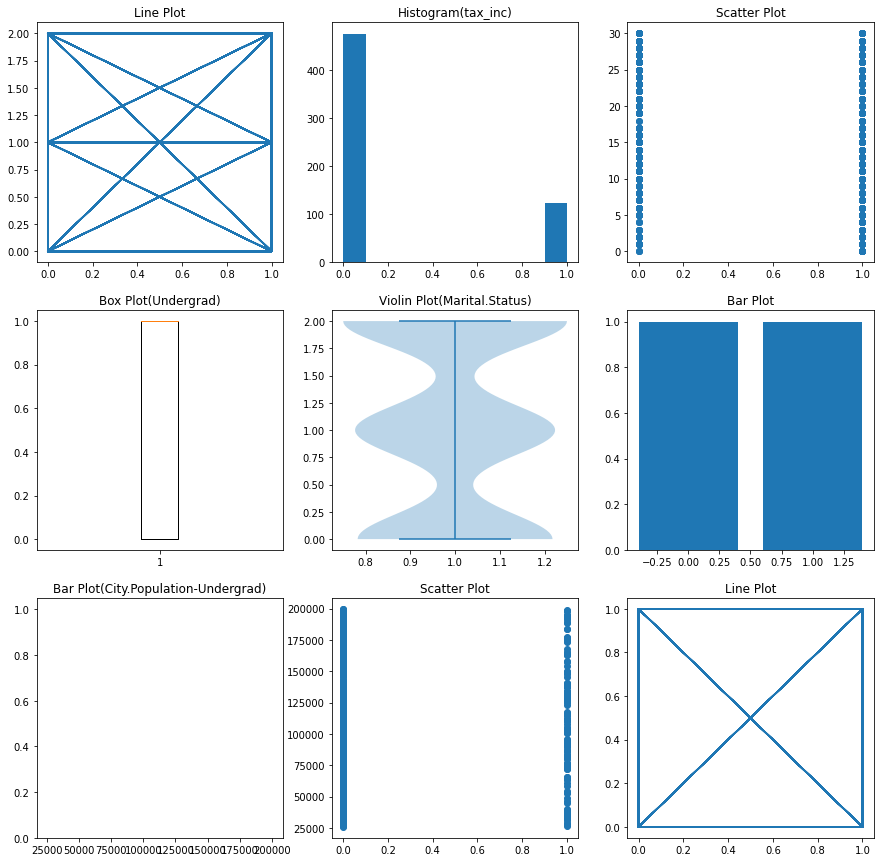

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize =(15,15))
ax[0,0].plot('Undergrad','Marital.Status', data = Fraud_C);ax[0,0].set_title("Line Plot")
ax[0,1].hist('tax_inc', data = Fraud_C);ax[0,1].set_title("Histogram(tax_inc)")
ax[0,2].scatter('Urban', 'Work.Experience', data = Fraud_C);ax[0,2].set_title("Scatter Plot")
ax[1,0].boxplot('Undergrad', data = Fraud_C);ax[1,0].set_title("Box Plot(Undergrad)")
ax[1,1].violinplot('Marital.Status', data = Fraud_C);ax[1,1].set_title("Violin Plot(Marital.Status)")
ax[1,2].bar('Urban','Undergrad', data = Fraud_C);ax[1,2].set_title("Bar Plot")
ax[2,0].bar(Fraud_C['City.Population'], Fraud_C["Undergrad"]);ax[2,0].set_title("Bar Plot(City.Population-Undergrad)")
ax[2,1].scatter('tax_inc','City.Population', data = Fraud_C);ax[2,1].set_title("Scatter Plot")
ax[2,2].plot('Undergrad','tax_inc', data = Fraud_C);ax[2,2].set_title("Line Plot")
plt.show()

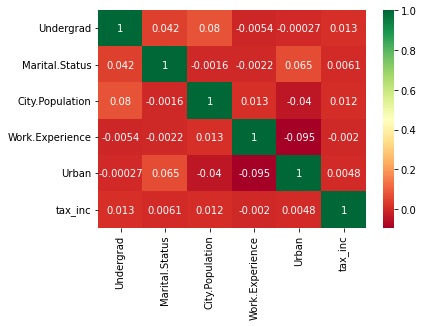

In [ ]:
sns.heatmap(Fraud_C.corr(), cmap = "RdYlGn", annot = True)
plt.show()

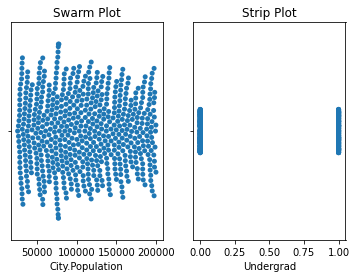

In [ ]:
plt.subplot(1,2,1)
sns.swarmplot('City.Population', data = Fraud_C);plt.title("Swarm Plot")
plt.subplot(1,2,2)
sns.stripplot( 'Undergrad', data = Fraud_C);plt.title("Strip Plot")
plt.show()

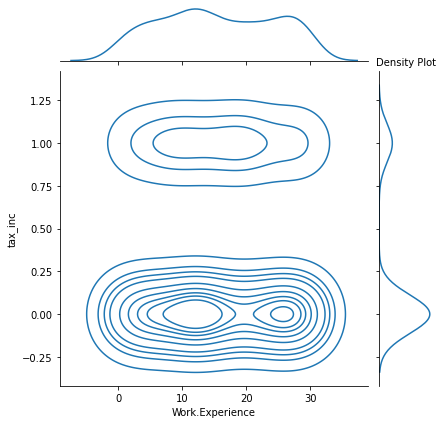

In [ ]:
sns.jointplot(Fraud_C['Work.Experience'], Fraud_C["tax_inc"], kind= 'kde')
plt.title("Density Plot", size = 10)
plt.show()

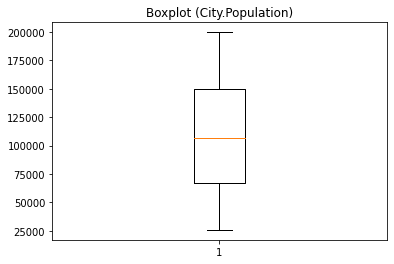

In [ ]:
# Boxplot for outlier detection
plt.boxplot(Fraud_C['City.Population']); plt.title("Boxplot (City.Population)")
plt.show()

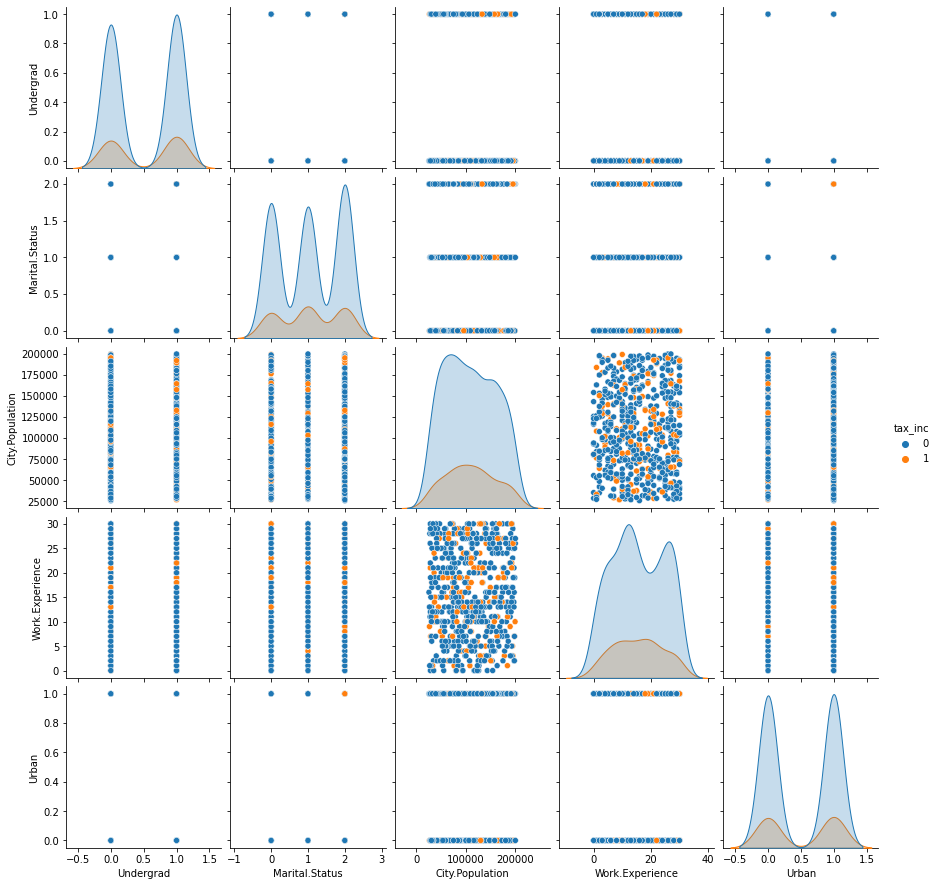

In [ ]:
# Plotting pairplot for visualize all the attributes in one plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(Fraud_C, hue = 'tax_inc')
plt.show()

#### Model Building , Training and Testing

In [ ]:
x = Fraud_C.iloc[:,:-1]
y = Fraud_C.iloc[:,-1]
print(x)
print(y)

     Undergrad  Marital.Status  City.Population  Work.Experience  Urban
0            0               2            50047               10      1
1            1               0           134075               18      1
2            0               1           160205               30      1
3            1               2           193264               15      1
4            0               1            27533               28      0
..         ...             ...              ...              ...    ...
595          1               0            39492                7      1
596          1               0            55369                2      1
597          0               0           154058                0      1
598          1               1           180083               17      0
599          0               0           158137               16      0

[600 rows x 5 columns]
0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: tax_inc

In [ ]:
# Splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 40)

#### Building Decision Tree Classifier Using Entropy Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

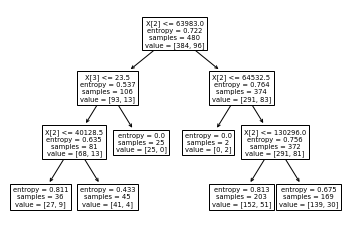

In [ ]:
# Plot the Decision Tree
from sklearn import tree
tree.plot_tree(model);

In [ ]:
y_train.value_counts().keys()

Int64Index([0, 1], dtype='int64')

In [ ]:
Fraud_C.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'tax_inc'],
      dtype='object')

In [ ]:
Fraud_C['tax_inc'].value_counts()

0    476
1    124
Name: tax_inc, dtype: int64

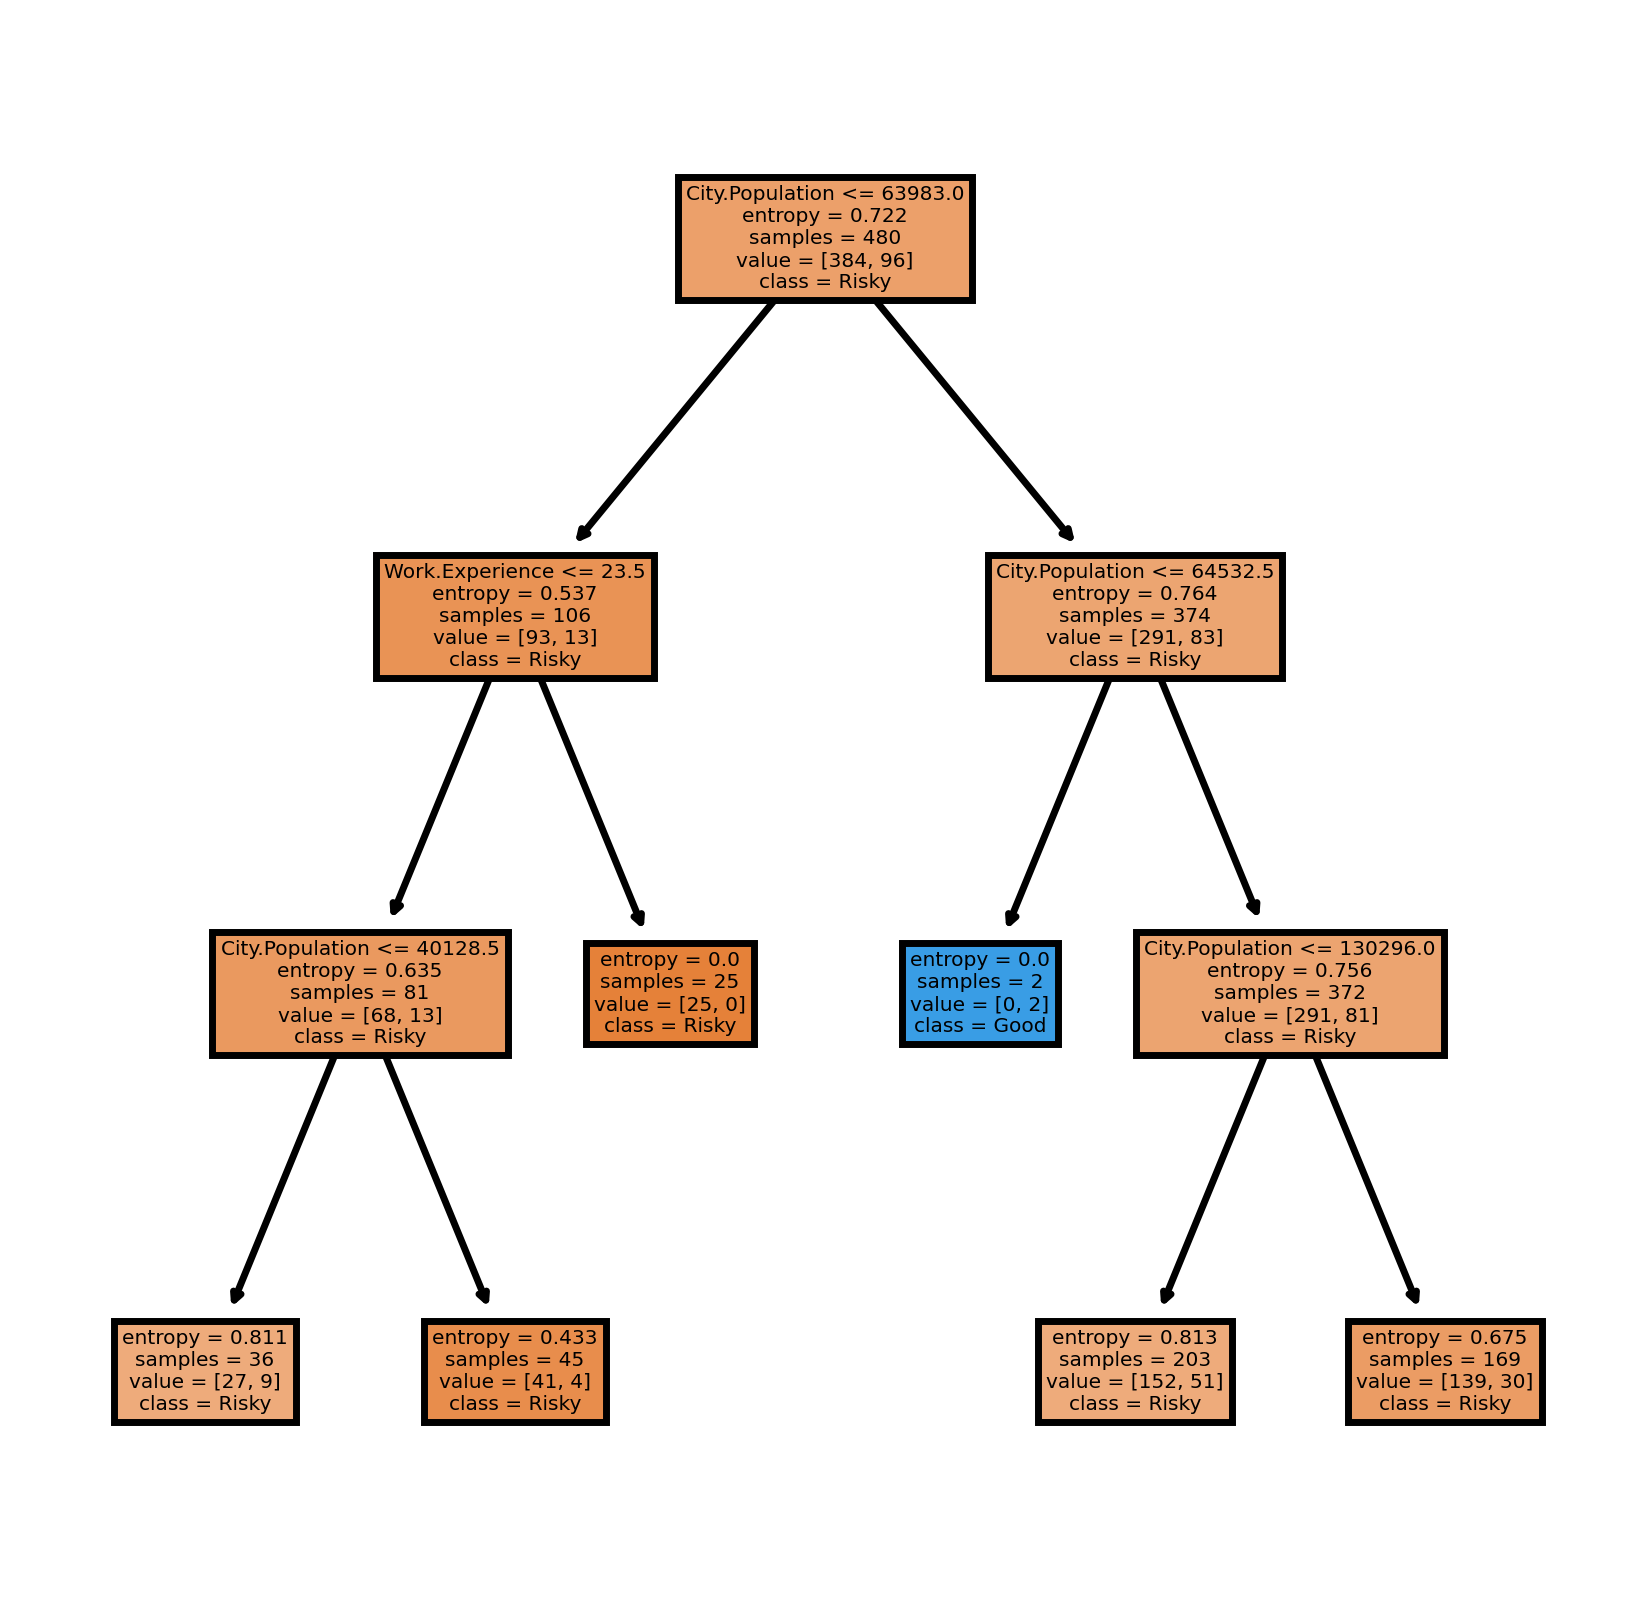

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
col = ['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience','Urban']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 500)
tree.plot_tree(model, feature_names = col, class_names = cn, filled = True)
plt.show()

In [ ]:
# Predicting on test data
preds = model.predict(x_test)     # predicting on test data set
pd.Series(preds).value_counts()    # Getting the count of each category

0    120
dtype: int64

In [ ]:
y_test.value_counts()

0    92
1    28
Name: tax_inc, dtype: int64

In [ ]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
pd.crosstab(y_test, preds)  # Getting the 2 way table to understand the correct and wrong predictions.

col_0,0
tax_inc,
0,92
1,28


In [ ]:
preds, y_test

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 159    0
 307    0
 253    0
 528    0
 137    1
       ..
 102    0
 577    0
 18     0
 560    0
 62     0
 Name: tax_inc, Length: 120, dtype: int64)

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
import numpy as np

np.mean(preds == y_test), accuracy_score(y_test, preds)

(0.7666666666666667, 0.7666666666666667)

#### Building Decision Tree Classifier (CART) using Gini Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [ ]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
# Prediction and Computing the accuracy
pred = model.predict(x_test)
np.mean(preds == y_test)

0.7666666666666667

#### Decision Tree Regression Example

In [ ]:
# Decision tree Regression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
array = Fraud_C.values
X = array[:,:-1]
Y = array[:,-1]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 1)

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [ ]:
# Find The accuracy
model.score(X_test, Y_test)

-1.1303797468354433

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
import pickle

In [ ]:
# we already Divided dataset into input and output(I.e. model building is done)
# model fitting
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [ ]:
# Save the model to disk
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
# Predict for X dataset
pickle.load(open(filename, 'rb'))
y_pred = classifier.predict(X)

In [ ]:
y_pred_Fraud_C = pd.DataFrame({'actual':Y, 'predicted_prob': classifier.predict(X)})

In [ ]:
y_pred_Fraud_C

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
595,0,0
596,0,0
597,0,0
598,0,0


In [ ]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y, y_pred)
print(confusion_matrix)

[[476   0]
 [124   0]]


In [ ]:
((476+0)/(476+0+124+0))*100

79.33333333333333

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       476
           1       0.00      0.00      0.00       124

    accuracy                           0.79       600
   macro avg       0.40      0.50      0.44       600
weighted avg       0.63      0.79      0.70       600



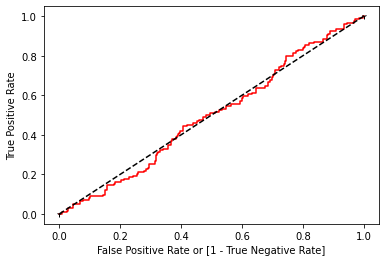

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color = 'red', label = 'logit model(area = %0.2f)' %auc)
plt.plot([0,1], [0,1], 'k--1')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
auc    # Accuracy

0.5

#### KNN Classification

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kfold = KFold(n_splits = 10)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 12)
results = cross_val_score(model, X, Y, cv = kfold)
print(results)
print("Accuracy is:", results.mean())

[0.78333333 0.76666667 0.71666667 0.75       0.81666667 0.71666667
 0.9        0.75       0.85       0.88333333]
Accuracy is: 0.7933333333333332


#### Grid Search for algorithm tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [ ]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [ ]:
print(grid.best_score_)

0.7933333333333332


#### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
# Take a sample of data set for training and testing.
X, Y = Fraud_C.iloc[:100,:-1], Fraud_C.iloc[:100,-1]

In [ ]:
Fraud_C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital.Status   600 non-null    int64
 2   City.Population  600 non-null    int64
 3   Work.Experience  600 non-null    int64
 4   Urban            600 non-null    int64
 5   tax_inc          600 non-null    int64
dtypes: int64(6)
memory usage: 28.2 KB


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((70, 5), (30, 5), (70,), (30,))

In [ ]:
# SVMC = SVC(random_state=42)

# svc_param_grid = {'kernel': ['rbf', 'sigmoid', 'poly','linear'], 
#                   'gamma': [1, 0.1, 0.01, 0.001],
#                   'C': [1000, 100, 10, 1],
#                   'tol':[0.001,0.0008,0.0009,0.0011]}

# gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = 10, scoring = "accuracy", n_jobs = 6, verbose = 1)

# gsSVMC.fit(x_train,y_train)

# svm_best = gsSVMC.best_estimator_

# gsSVMC.best_score_

In [72]:
#  Grid Search CV
clf = SVC()
param_grid = [{'kernel': ['linear', 'rbf'], 'gamma' : [0.5,0.1,0.1], 'C':[10,0.1,0.001,0.0001]}]
gsv = GridSearchCV(clf, param_grid, cv = 10, verbose = 30)
gsv.fit(x_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 1/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.714 total time=   7.2s
[CV 2/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 2/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.857 total time=  23.4s
[CV 3/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 3/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.857 total time=   7.6s
[CV 4/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 4/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.714 total time=  11.8s
[CV 5/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 5/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.714 total time=   7.9s
[CV 6/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 6/10; 1/24] END C=10, gamma

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 0.001, 0.0001],
                          'gamma': [0.5, 0.1, 0.1],
                          'kernel': ['linear', 'rbf']}],
             verbose=30)

In [73]:
gsv.best_params_, gsv.best_score_

({'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7571428571428571)

In [ ]:
clf = SVC(kernel = 'linear', C = 10)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy is: ", acc)
confusion_matrix(y_test, y_pred)

Accuracy is:  80.0


array([[24,  0],
       [ 6,  0]])

### 2. Company Data

About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
1. Sales -- Unit sales (in thousands) at each location
2. Competitor Price -- Price charged by competitor at each location
3. Income -- Community income level (in thousands of dollars)
4. Advertising -- Local advertising budget for company at each location (in thousands of dollars)
5. Population -- Population size in region (in thousands)
6. Price -- Price company charges for car seats at each site
7. Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
8. Age -- Average age of the local population
9. Education -- Education level at each location
10. Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
11. US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [74]:


import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [75]:
Comp_D = pd.read_csv(r"/content/Company_Data.csv")
Comp_D.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


#### EDA

In [76]:
# Rows and columns in data
Comp_D.shape

(400, 11)

In [77]:
# data info
Comp_D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [78]:
# no. of columns in dataset
Comp_D.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [79]:
# Index
Comp_D.index

RangeIndex(start=0, stop=400, step=1)

In [80]:
# Descriptive Analysis
Comp_D.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [81]:
# correlation
Comp_D.corr()   

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [82]:
# Null values in dataset
Comp_D.isna().sum()  
# Or
# Comp_D.isna().any()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [83]:
# Mean of sales values
Comp_D['Sales'].mean()  

7.496325000000001

In [84]:
# to convert continuous variables into categorical variable use for loop, sales<=7.49 = Low, sales>7.49 = High
sales_val = []
for value in Comp_D["Sales"]:
    if value<=7.49:
        sales_val.append("low")
    else:
        sales_val.append("high")
        
Comp_D["sales_val"]=sales_val

In [85]:
Comp_D['sales_val']

0      high
1      high
2      high
3       low
4       low
       ... 
395    high
396     low
397     low
398     low
399    high
Name: sales_val, Length: 400, dtype: object

In [86]:
Comp_D.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'sales_val'],
      dtype='object')

In [87]:
# Dropping duplicate columns
Comp_D.drop('Sales', axis = 1, inplace = True)

#### Visualization

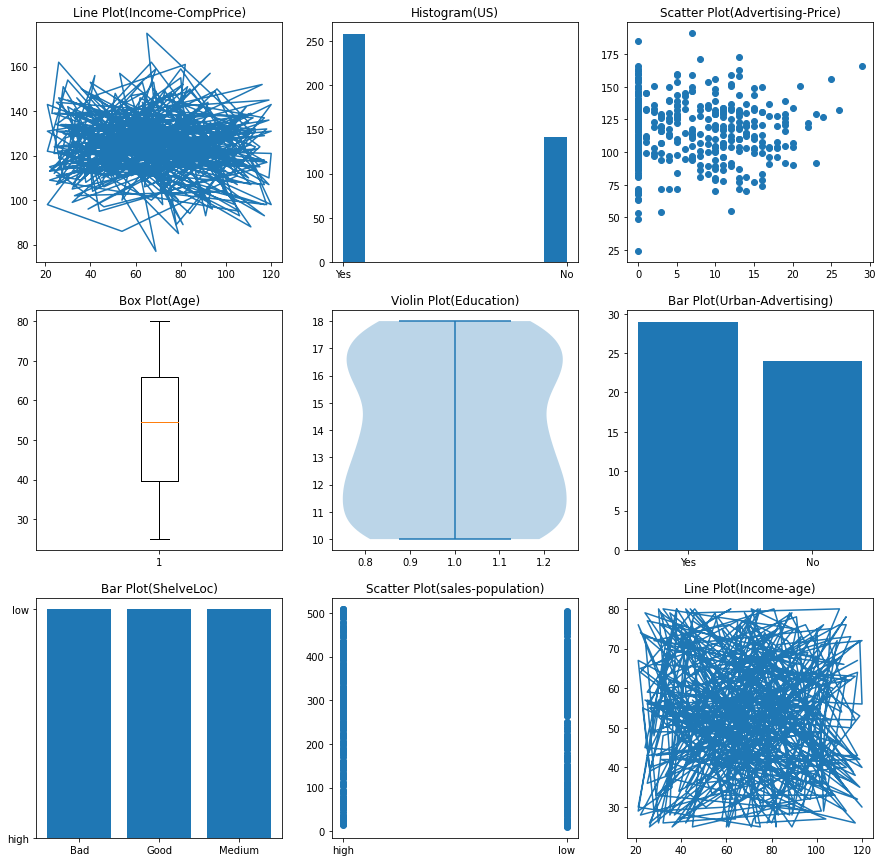

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize =(15,15))
ax[0,0].plot('Income','CompPrice', data = Comp_D);ax[0,0].set_title("Line Plot(Income-CompPrice)")
ax[0,1].hist('US', data = Comp_D);ax[0,1].set_title("Histogram(US)")
ax[0,2].scatter('Advertising', 'Price', data = Comp_D);ax[0,2].set_title("Scatter Plot(Advertising-Price)")
ax[1,0].boxplot('Age', data = Comp_D);ax[1,0].set_title("Box Plot(Age)")
ax[1,1].violinplot('Education', data = Comp_D);ax[1,1].set_title("Violin Plot(Education)")
ax[1,2].bar('Urban','Advertising', data = Comp_D);ax[1,2].set_title("Bar Plot(Urban-Advertising)")
ax[2,0].bar(Comp_D['ShelveLoc'], Comp_D["sales_val"]);ax[2,0].set_title("Bar Plot(ShelveLoc)")
ax[2,1].scatter('sales_val','Population', data = Comp_D);ax[2,1].set_title("Scatter Plot(sales-population)")
ax[2,2].plot('Income','Age', data = Comp_D);ax[2,2].set_title("Line Plot(Income-age)")
plt.show()

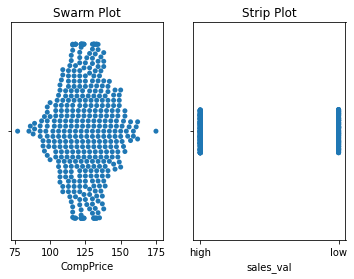

In [89]:
# Swarmplot & Striplot
plt.subplot(1,2,1)
sns.swarmplot('CompPrice', data = Comp_D);plt.title("Swarm Plot")
plt.subplot(1,2,2)
sns.stripplot( 'sales_val', data = Comp_D);plt.title("Strip Plot")
plt.show()

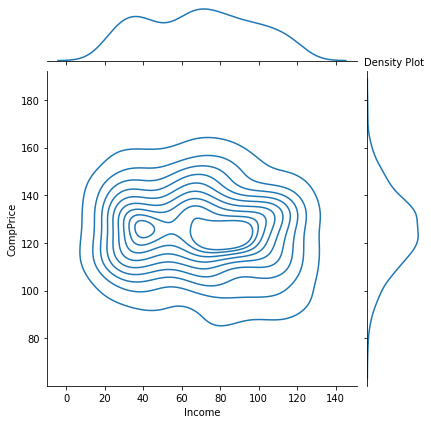

In [90]:
# Density plot
sns.jointplot(Comp_D['Income'], Comp_D["CompPrice"], kind= 'kde')
plt.title("Density Plot", size = 10)
plt.show()

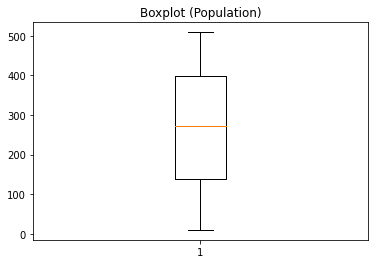

In [91]:

# Boxplot for outlier detection
plt.boxplot(Comp_D['Population']); plt.title("Boxplot (Population)")
plt.show()

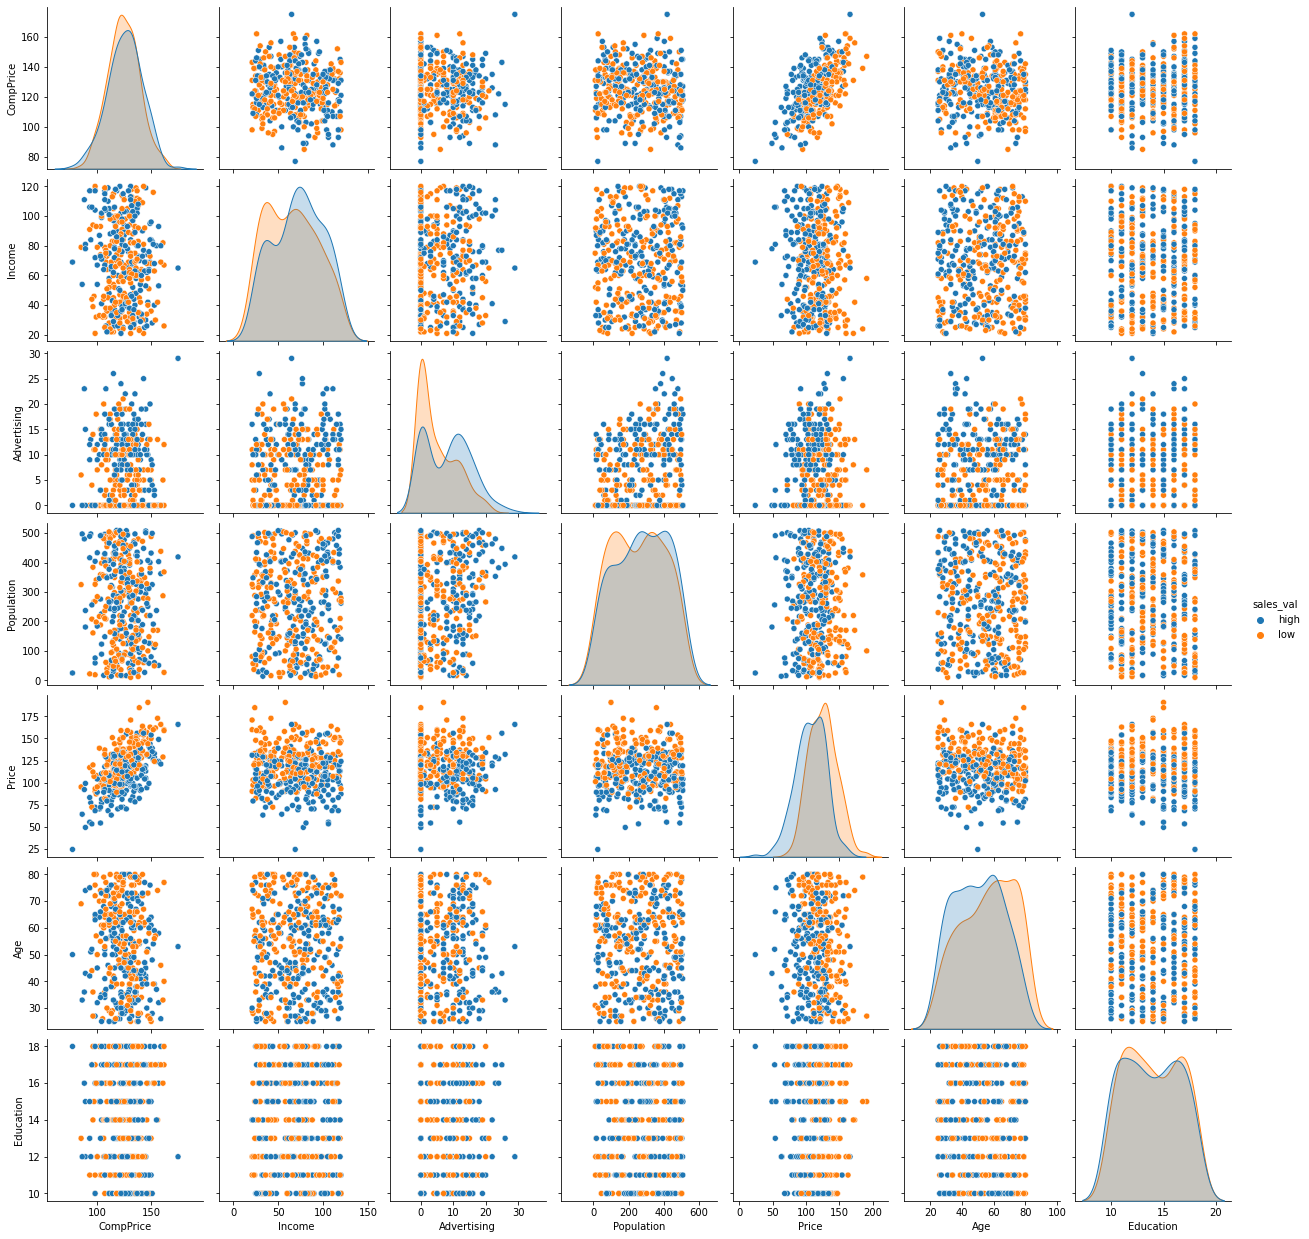

In [92]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data= Comp_D, hue = 'sales_val' )
plt.show()

In [93]:
print(Comp_D['US'].unique())
print(Comp_D['ShelveLoc'].unique())
print(Comp_D['Urban'].unique())
print(Comp_D['sales_val'].unique())

['Yes' 'No']
['Bad' 'Good' 'Medium']
['Yes' 'No']
['high' 'low']


In [94]:
# Convert all the categorical variables to numeric
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
Comp_D['US'] = LE.fit_transform(Comp_D['US'])
Comp_D['ShelveLoc'] = LE.fit_transform(Comp_D['ShelveLoc'])
Comp_D['Urban'] = LE.fit_transform(Comp_D['Urban'])
Comp_D['sales_val'] = LE.fit_transform(Comp_D['sales_val'])

# OR
#Creating dummy vairables dropping first dummy variable
#Comp_D=pd.get_dummies(Comp_D,columns=['Urban','US'], drop_first=True)

In [95]:
print(Comp_D['US'].value_counts())
print(Comp_D['ShelveLoc'].value_counts())
print(Comp_D['Urban'].value_counts())
print(Comp_D['sales_val'].value_counts())

1    258
0    142
Name: US, dtype: int64
2    219
0     96
1     85
Name: ShelveLoc, dtype: int64
1    282
0    118
Name: Urban, dtype: int64
1    201
0    199
Name: sales_val, dtype: int64


In [96]:
Comp_D.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'sales_val'],
      dtype='object')

#### Model Building, Training, Testing

In [97]:
x = Comp_D.iloc[:,:-1]
y = Comp_D.iloc[:,-1]
# OR  y = sales_val
#print(x)
#print(y)

In [98]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 40)

#### Building Decision Tree Classifier Using Entropy Criteria

In [99]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [100]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

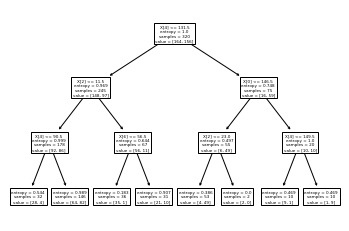

In [101]:
# Plot the Decision Tree
from sklearn import tree
tree.plot_tree(model);

In [102]:
y_train.value_counts().keys()

Int64Index([0, 1], dtype='int64')

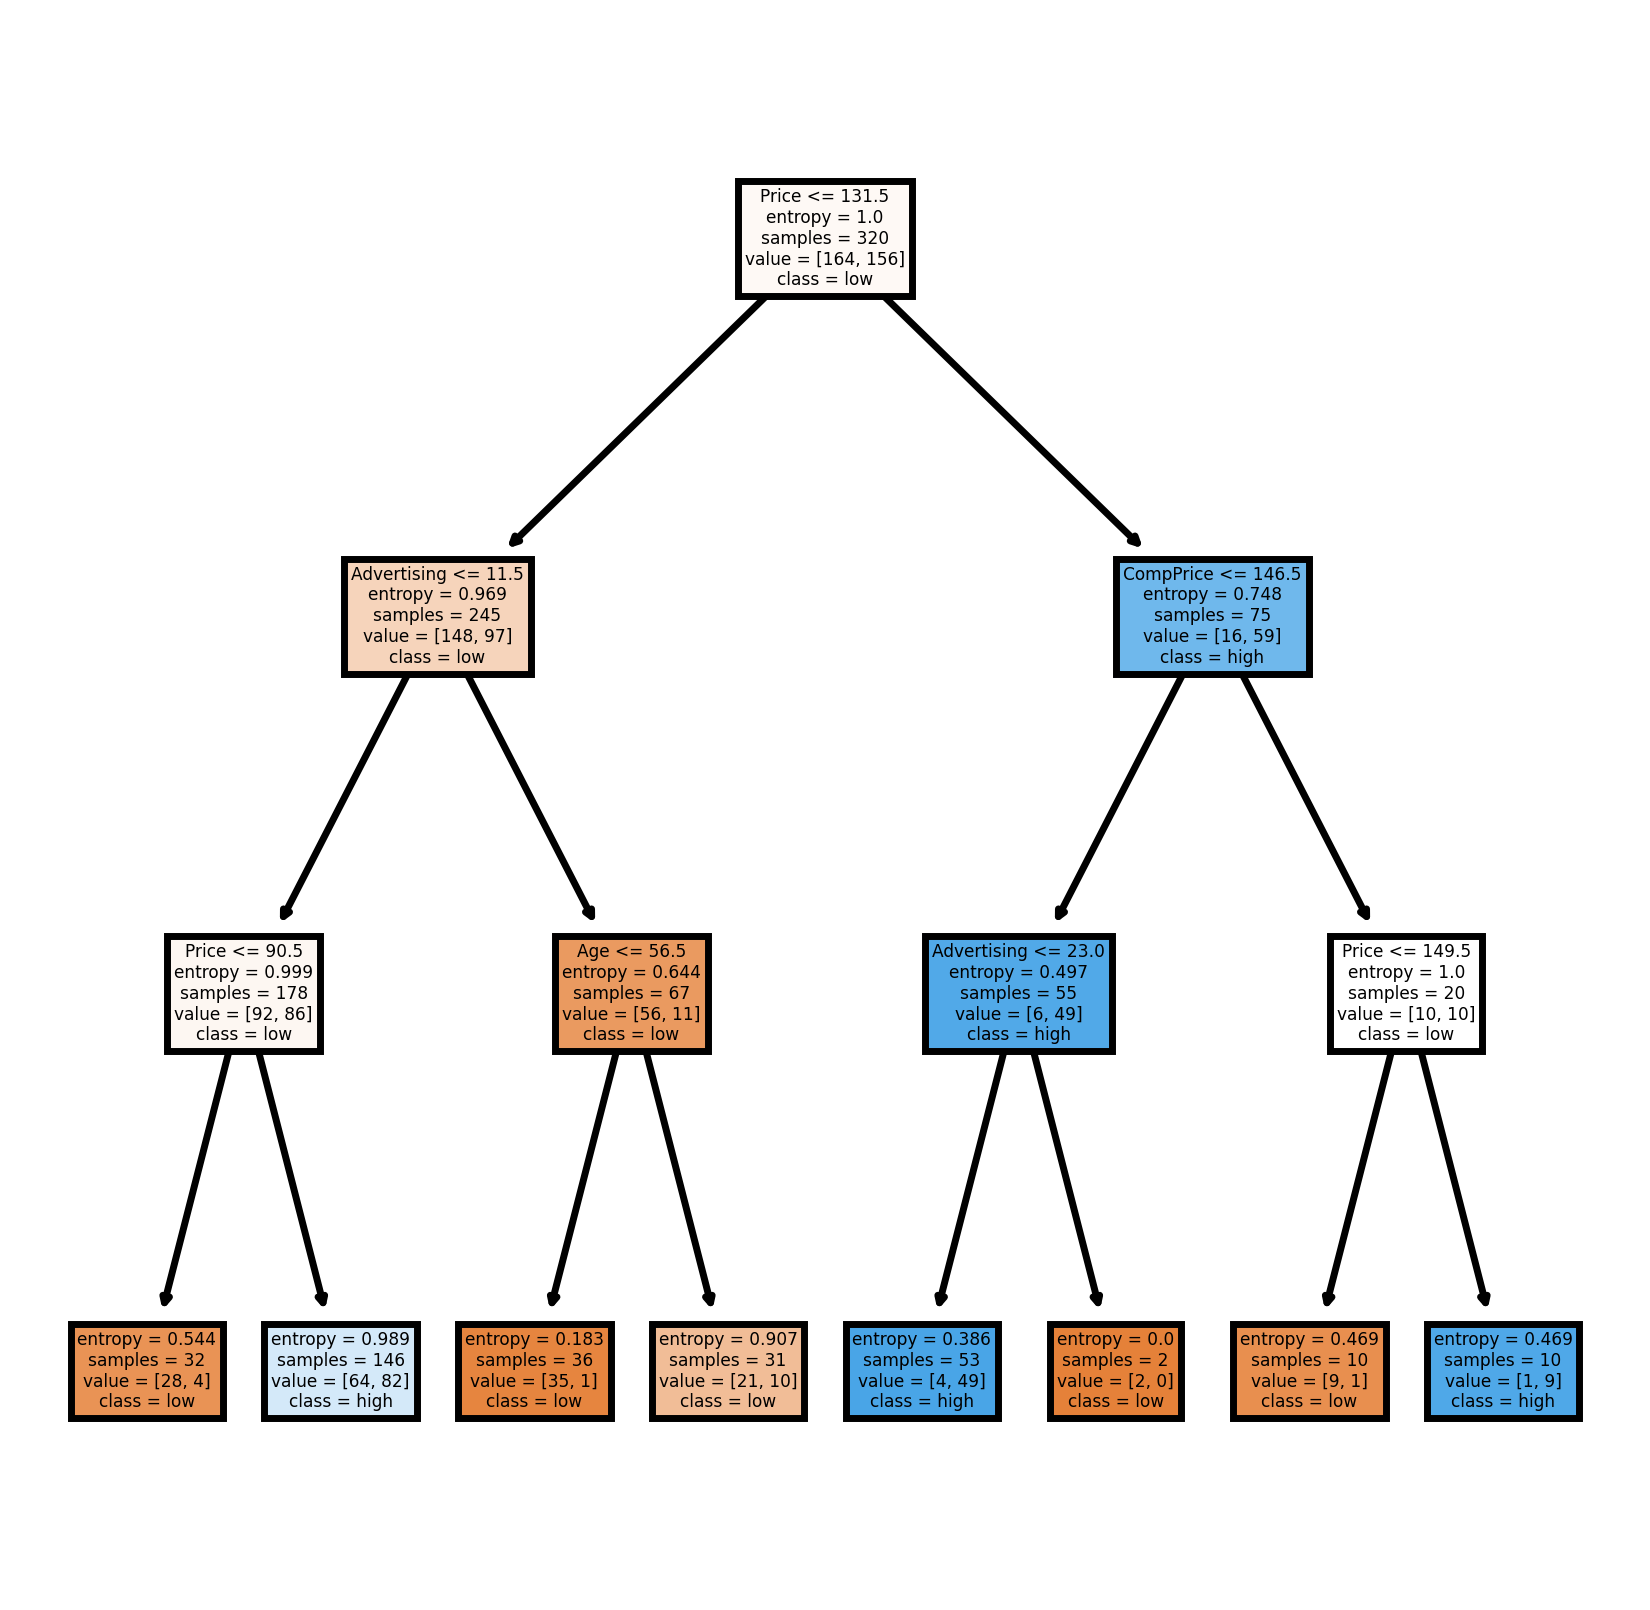

In [103]:
import matplotlib.pyplot as plt
from sklearn import tree
col = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price','ShelveLoc', 'Age', 'Education', 'Urban', 'US']   # Columns
cn = ['low', 'high']   # value_counts.keys
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 500)
tree.plot_tree(model, feature_names = col, class_names = cn, filled = True)
plt.show()

In [104]:
# predicting on test data
preds = model.predict(x_test)   # Predicting on test data set
pd.Series(preds).value_counts()   # Getting the count of each category

1    56
0    24
dtype: int64

In [105]:
y_test.value_counts()

1    45
0    35
Name: sales_val, dtype: int64

In [106]:
preds

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0])

In [107]:
# Getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test, preds)  

col_0,0,1
sales_val,,
0,17,18
1,7,38


In [108]:
preds, y_test

(array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0]), 132    0
 390    1
 310    0
 3      1
 248    1
       ..
 361    0
 197    1
 23     1
 54     1
 58     1
 Name: sales_val, Length: 80, dtype: int64)

In [109]:
# Accuracy
from sklearn.metrics import accuracy_score
import numpy as np

np.mean(preds==y_test), accuracy_score(y_test, preds)

(0.6875, 0.6875)

#### Building Decision tree Classifier (CART) using Gini Criteria

In [110]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [111]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [112]:
# Prediction and Computing the accuracy
pred = model.predict(x_test)
np.mean(preds == y_test)

0.6875

#### Decision Tree Regression Example

In [113]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [114]:
array = Comp_D.values
X = array[:,:-1]
Y = array[:,-1]

In [115]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 1)

In [116]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [117]:
# Find the accuracy
model.score(X_test, Y_test)

-0.30332950631458133

#### Logistic Regression

In [118]:
# Dividing dataset into input and output
X = Comp_D.iloc[:,:-1]
Y = Comp_D.iloc[:,-1]
# print(X)
# print(Y)

In [119]:
from sklearn.linear_model import LogisticRegression
import pickle

In [120]:
# we already Divided dataset into input and output(I.e. model building is done)
# model fitting
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [121]:
# Save the model to disk
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [122]:
# Predict for X dataset
pickle.load(open(filename, 'rb'))
y_pred = classifier.predict(X)

In [123]:
y_pred_Comp_D = pd.DataFrame({'actual':Y, 'predicted_prob': classifier.predict(X)})

In [124]:
y_pred_Comp_D 

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,1,0
4,1,1
...,...,...
395,0,0
396,1,0
397,1,0
398,1,1


In [125]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y, y_pred)
print(confusion_matrix)

[[157  42]
 [ 30 171]]


In [126]:
((158+170)/(158+41+31+170))*100

82.0

In [127]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       199
           1       0.80      0.85      0.83       201

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



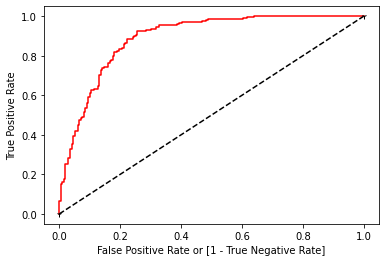

In [128]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color = 'red', label = 'logit model(area = %0.2f)' %auc)
plt.plot([0,1], [0,1], 'k--1')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [129]:
auc    # Accuracy

0.8198454961374034

#### KNN Classification

In [130]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [131]:
kfold = KFold(n_splits = 10)

In [132]:
model = KNeighborsClassifier(n_neighbors = 12)
results = cross_val_score(model, X, Y, cv = kfold)
print(results)
print("Accuracy is:", results.mean())

[0.625 0.75  0.475 0.575 0.4   0.7   0.55  0.575 0.5   0.55 ]
Accuracy is: 0.5700000000000001


In [133]:
# Grid Search for algorithm tuning
from sklearn.model_selection import GridSearchCV
import numpy as np

In [134]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [135]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [136]:
print(grid.best_score_)

0.6300000000000001


#### SVM

In [137]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [138]:
Comp_D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CompPrice    400 non-null    int64
 1   Income       400 non-null    int64
 2   Advertising  400 non-null    int64
 3   Population   400 non-null    int64
 4   Price        400 non-null    int64
 5   ShelveLoc    400 non-null    int64
 6   Age          400 non-null    int64
 7   Education    400 non-null    int64
 8   Urban        400 non-null    int64
 9   US           400 non-null    int64
 10  sales_val    400 non-null    int64
dtypes: int64(11)
memory usage: 34.5 KB


In [139]:
# Dividing dataset into input and output
X = Comp_D.iloc[:100,:-1]
Y = Comp_D.iloc[:100,-1]
# print(X)
# print(Y)

In [140]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [141]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((70, 10), (30, 10), (70,), (30,))

In [142]:
#  Grid Search CV
clf = SVC()
param_grid = [{'kernel': ['linear', 'rbf'], 'gamma' : [0.5,0.1,0.1], 'C':[10,0.1,0.001,0.0001]}]
gsv = GridSearchCV(clf, param_grid, cv = 10, verbose = 30)
gsv.fit(x_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 1/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.714 total time=   4.7s
[CV 2/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 2/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.571 total time=   1.4s
[CV 3/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 3/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.857 total time=   2.3s
[CV 4/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 4/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.714 total time=   1.3s
[CV 5/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 5/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.714 total time=   2.4s
[CV 6/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 6/10; 1/24] END C=10, gamma

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 0.001, 0.0001],
                          'gamma': [0.5, 0.1, 0.1],
                          'kernel': ['linear', 'rbf']}],
             verbose=30)

In [143]:
gsv.best_params_, gsv.best_score_

({'C': 0.1, 'gamma': 0.5, 'kernel': 'linear'}, 0.8285714285714285)

In [144]:
clf = SVC(kernel = 'linear', C = 10)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy is: ", acc)
confusion_matrix(y_test, y_pred)

Accuracy is:  86.66666666666667


array([[16,  1],
       [ 3, 10]])